In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from  matplotlib import pyplot
import seaborn as sns

In [4]:
train_df = pd.read_csv('data/train.csv', index_col='row_id', dtype={"place_id": str})

In [5]:
train_df.describe()

,x,y,accuracy,time
count,29118021.000000,29118021.000000,29118021.000000,29118021.000000
mean,4.999770,5.001814,82.849125,417010.364723
std,2.857601,2.887505,114.751772,231176.146498
min,0.000000,0.000000,1.000000,1.000000
25%,2.534700,2.496700,27.000000,203057.000000
50%,5.009100,4.988300,62.000000,433922.000000
75%,7.461400,7.510300,75.000000,620491.000000
max,10.000000,10.000000,1033.000000,786239.000000


The (x,y) coordinates seem to be uniformly distributed in the 10x10 grid.

The maximum accuracy value is 1033, but given the percentiles, that looks more like an outlier, so let's take a closer look at that column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1e8dc72b0>]], dtype=object)

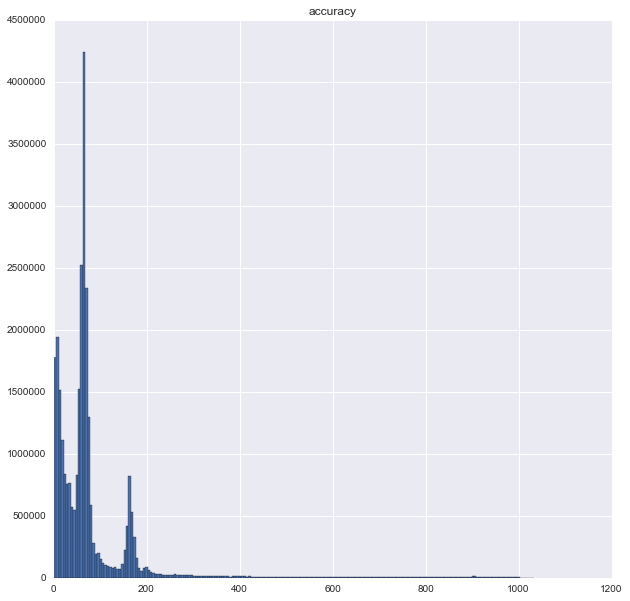

In [6]:
pd.DataFrame.hist(train_df, 'accuracy', bins=200, figsize=(10,10))

The range of values is quite big, but most of the mass is concentrated in the 0-200 and especially the 0-100 range. Let's quantify that.

In [7]:
def percentage_lt(x): return train_df[train_df.accuracy < x].size/train_df.size * 100.0
print("Less than 100: {:f} %".format(percentage_lt(100)))
print("Less than 200: {:f} %".format(percentage_lt(200)))
print("Less than 500: {:f} %".format(percentage_lt(500)))
print("Less than 1000: {:f} %".format(percentage_lt(1000)))

Less than 100: 81.808513 %
Less than 200: 94.580717 %
Less than 500: 98.052625 %
Less than 1000: 99.988540 %


Let's visualize the distribution of number of check-ins per location

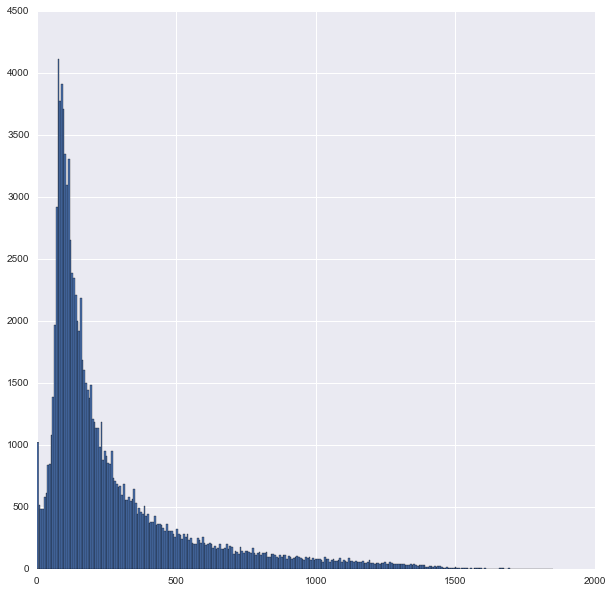

In [29]:
check_ins_per_location = train_df['place_id'].value_counts()
check_ins_per_location.hist(bins=300, figsize=(10,10))

While there are locations with a very small number of check-ins, it looks like most locations have an appreciable number of them. Let's see some numbers:

In [43]:
def percentage_lt_checkins(x): 
    return check_ins_per_location[check_ins_per_location <= x].size/check_ins_per_location.size * 100

print("Just 1 check-in: {:f} %".format(percentage_lt_checkins(1)))
print("10 check-ins or less: {:f} %".format(percentage_lt_checkins(10)))
print("100 check-ins or less: {:f} %".format(percentage_lt_checkins(100)))

Just 1 check-in: 0.226958 %
10 check-ins or less: 1.179076 %
100 check-ins or less: 26.590091 %


Let's now visualize a random subset of places and the distribution of checkin locations

In [44]:
all_places = train_df['place_id'].unique()

In [45]:
def plot_random_locations(num_locations):
    np.random.shuffle(all_places)
    selected_locations = all_places[:num_locations]
    selected_df = train_df[train_df['place_id'].isin(selected_locations)]
    fg = sns.FacetGrid(data=selected_df, hue='place_id', size=10)
    fg.map(pyplot.scatter, 'x', 'y').add_legend()

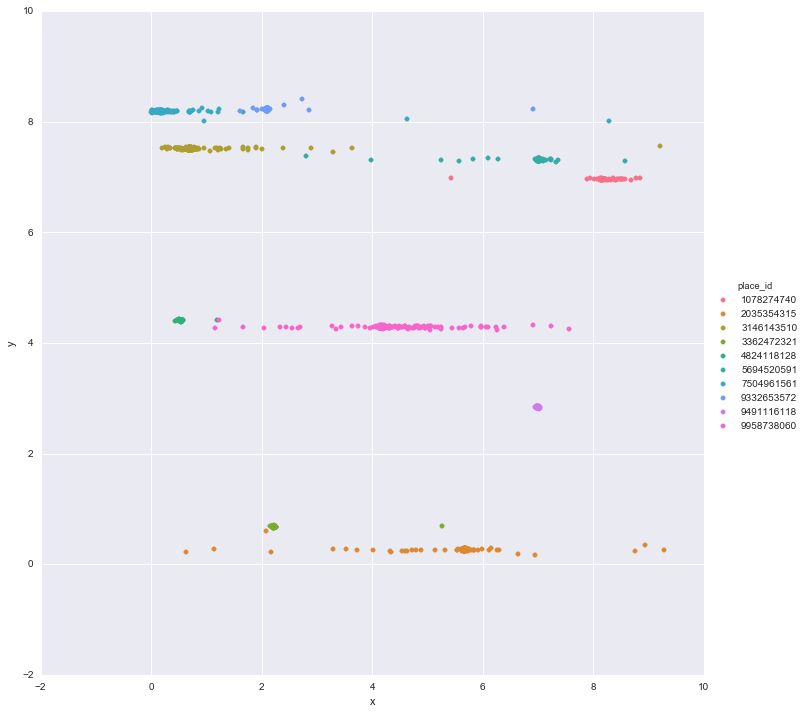

In [46]:
plot_random_locations(10)